In [3]:
import os
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import sklearn
from geopy.geocoders import Nominatim
from icecream import ic
from sale_prediction import custom_transformers
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    auc,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    roc_curve,
)
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

LIB_PATH = r"lib/src"
if LIB_PATH not in sys.path:
    sys.path.append(LIB_PATH)
    print(f"Added {LIB_PATH} sucessfully to python path")

In [2]:
DATA_PATH = "data"
FILE_NAME = "armslengthsales_2024_valid.csv"

In [3]:
file_path = os.path.join(DATA_PATH, FILE_NAME)

In [4]:
df = pd.read_csv(file_path)
df.shape

(1417, 20)

In [5]:
CAT_FEATURES = ["PropType", "District", "Style"]
NUM_FEATURES = ["Stories", "Year_Built", "Units", "FinishedSqft"]  # , "CondoProject"]
FEATURES = CAT_FEATURES + NUM_FEATURES
TARGET = "Sale_price"

X = df[FEATURES]
y = df[TARGET]

In [6]:
numeric_preprocessor = Pipeline(
    [
        ("imputation_mean", custom_transformers.SimpleImputerWithNames(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    [
        (
            "imputation_constant",
            custom_transformers.SimpleImputerWithNames(fill_value="missing", strategy="constant"),
        ),
        ("rare", custom_transformers.RareTransformer(threshold=0.05)),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, CAT_FEATURES),
        ("numerical", numeric_preprocessor, NUM_FEATURES),
    ]
)

# categorical_preprocessor.fit_transform(X[CAT_FEATURES])
# categorical_preprocessor.get_feature_names_out()

In [ ]:
pd.DataFrame(preprocessor.fit_transform(X, y)).to_csv("pipeline_output.csv")
preprocessor.get_feature_names_out()

In [85]:
# Sample data with mixed types
data = pd.DataFrame(
    {
        "Category": ["A", "B", "A", "C", "C", 1, "D", "A", "B", 2, "D", "E", "F", 3],
        "Group": ["X", "X", "Y", "Y", "Z", "Z", "X", "X", "Y", "Y", "Z", 10, "X", 20],
    }
)

# Define pipeline
pipeline = Pipeline(
    [
        ("low_freq_replacer", LowFrequencyReplacer(threshold=0.5, replacement="Rare")),
        ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# Apply pipeline to data
pipeline.fit(data)
transformed_data = pipeline.transform(data)

# Get feature names
feature_names = pipeline.named_steps["one_hot_encoder"].get_feature_names_out()
print("Feature Names:")
print(feature_names)

# Display transformed data
print("\nTransformed Data:")
print(transformed_data.toarray())

Feature Names:
['Category_Rare' 'Group_Rare']

Transformed Data:
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


C:\Users\Felix\AppData\Local\Temp\ipykernel_29716\1655138596.py:98: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_transformed = X.applymap(self._replace_low_frequency)
C:\Users\Felix\AppData\Local\Temp\ipykernel_29716\1655138596.py:98: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_transformed = X.applymap(self._replace_low_frequency)


In [ ]:
preprocessor.get_feature_names_out()

In [38]:
numeric_preprocessor.fit_transform(X[NUM_FEATURES], y)

array([[-0.8791224 ,  0.58255741, -0.15763417,  1.7333332 ],
       [-0.8791224 ,  0.43903612, -0.15763417, -0.07063916],
       [ 1.30822708,  0.33772698, -0.15763417, -0.17066739],
       ...,
       [-0.8791224 ,  0.00847226, -0.15763417, -0.20877338],
       [ 0.21455234, -0.04218231, -0.15763417, -0.18582318],
       [ 0.21455234, -0.0084126 , -0.15763417, -0.05764848]])

In [40]:
numeric_preprocessor.get_feature_names_out()

array(['Stories', 'Year_Built', 'Units', 'FinishedSqft'], dtype=object)

In [ ]:
categorical_preprocessor.fit_transform(X[CAT_FEATURES], y)

In [42]:
categorical_preprocessor.get_feature_names_out()

array(['PropType_Commercial', 'PropType_Condominium', 'PropType_Exempt',
       'PropType_Lg Apartment', 'PropType_Residential', 'District_1',
       'District_2', 'District_3', 'District_4', 'District_5',
       'District_6', 'District_7', 'District_8', 'District_9',
       'District_10', 'District_11', 'District_12', 'District_13',
       'District_14', 'District_15',
       'Style_AP1 (Conventional Apt with 4-6 Units)',
       'Style_AP3 (Conventional Apt with 12-20 Units)',
       'Style_AP4 (Conv Apt with 21 or more Units)', 'Style_Auto Repair',
       'Style_Bank, Savings & Loan', 'Style_Bi-Level', 'Style_Cape Cod',
       'Style_Car Wash', 'Style_Colonial', 'Style_Condo Duplex',
       'Style_Condo Ranch', 'Style_Condo Townhouse', 'Style_Contemporary',
       'Style_Cottage', 'Style_Day Care Center', 'Style_Dplx Bungalow',
       'Style_Duplex N/S', 'Style_Duplex O/S', 'Style_Duplex-Cottage',
       'Style_High Rise > 12 Stories', 'Style_Hotel - Limited Service',
       'Style_L

In [43]:
preprocessor.get_feature_names_out()

array(['categorical__PropType_Commercial',
       'categorical__PropType_Condominium',
       'categorical__PropType_Exempt',
       'categorical__PropType_Lg Apartment',
       'categorical__PropType_Residential', 'categorical__District_1',
       'categorical__District_2', 'categorical__District_3',
       'categorical__District_4', 'categorical__District_5',
       'categorical__District_6', 'categorical__District_7',
       'categorical__District_8', 'categorical__District_9',
       'categorical__District_10', 'categorical__District_11',
       'categorical__District_12', 'categorical__District_13',
       'categorical__District_14', 'categorical__District_15',
       'categorical__Style_AP1 (Conventional Apt with 4-6 Units)',
       'categorical__Style_AP3 (Conventional Apt with 12-20 Units)',
       'categorical__Style_AP4 (Conv Apt with 21 or more Units)',
       'categorical__Style_Auto Repair',
       'categorical__Style_Bank, Savings & Loan',
       'categorical__Style_Bi-Le

In [11]:
# pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
pipe = make_pipeline(preprocessor, RandomForestRegressor())
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['PropType', 'District',
                                                   'Style']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Stories', 'Year_Built',
                                                   'Units',
                                                   'FinishedSqft'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Fit the pipeline to your training data
pipe.fit(X_train, y_train)

# Make predictions on the test set
predictions = pipe.predict(X_test)
pipe.score(X_test, y_test)

0.6662541980137182

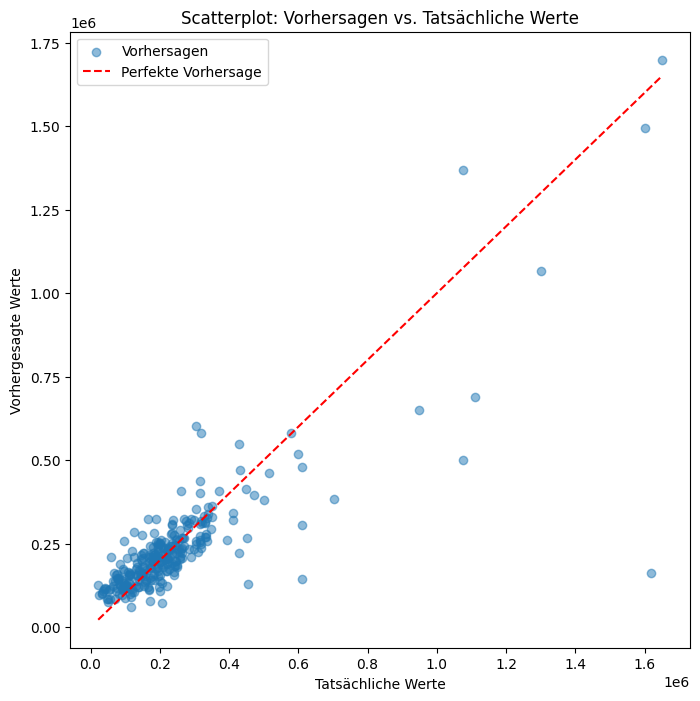

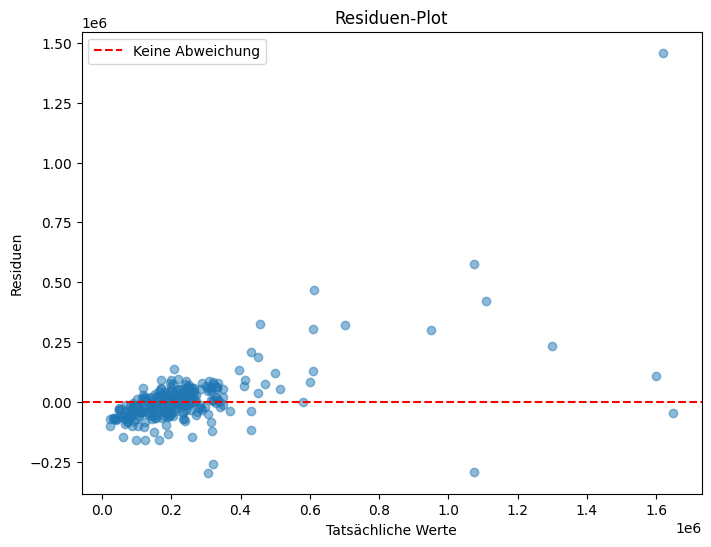

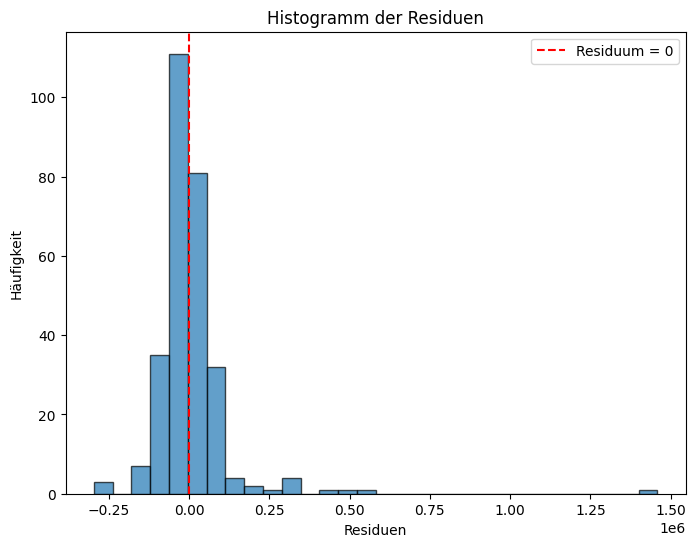

Mean Absolute Error (MAE): 61850.93
Root Mean Squared Error (RMSE): 125138.62
R-Squared (R²): 0.67


In [14]:
# Assuming y_test (true values) and predictions (predicted values) are available

# 1. Scatterplot: Predictions vs. True Values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.5, label="Vorhersagen")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfekte Vorhersage")
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vorhergesagte Werte")
plt.legend()
plt.title("Scatterplot: Vorhersagen vs. Tatsächliche Werte")
plt.show()

# 2. Residuen-Plot
residuals = y_test - predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--", label="Keine Abweichung")
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Residuen")
plt.title("Residuen-Plot")
plt.legend()
plt.show()

# 3. Histogramm der Residuen
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor="k", alpha=0.7)
plt.axvline(0, color="red", linestyle="--", label="Residuum = 0")
plt.xlabel("Residuen")
plt.ylabel("Häufigkeit")
plt.title("Histogramm der Residuen")
plt.legend()
plt.show()

# 4. Metriken ausgeben
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

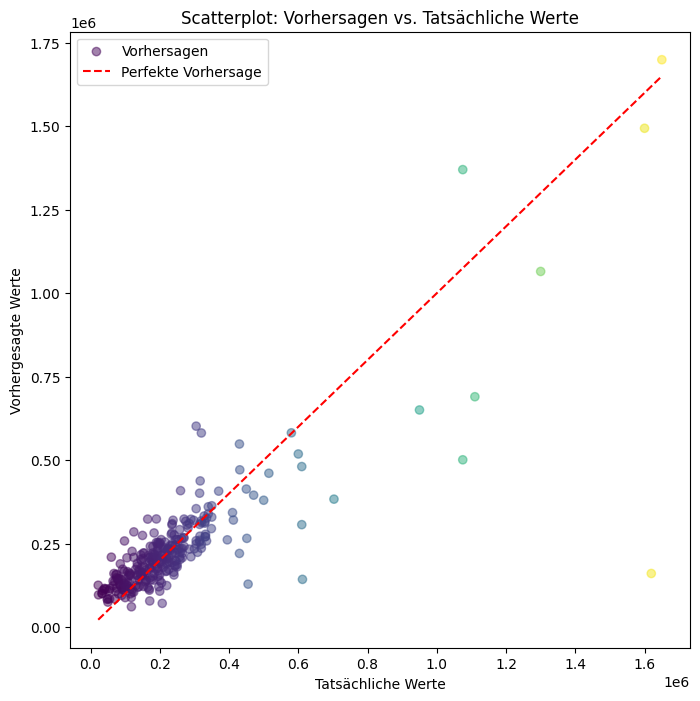

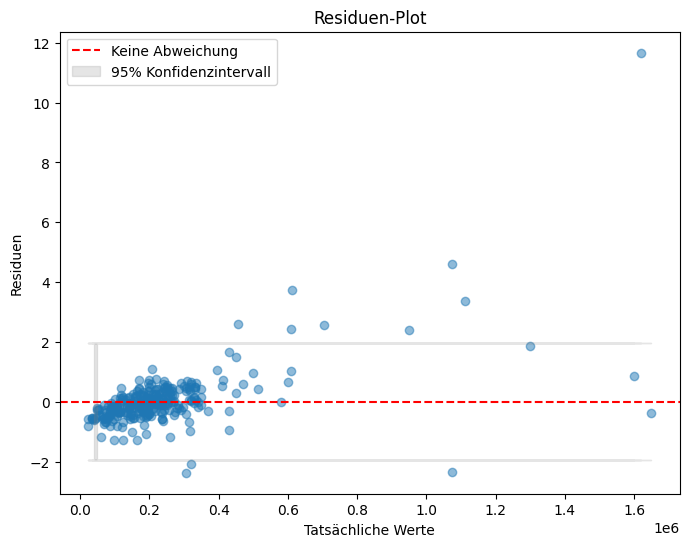

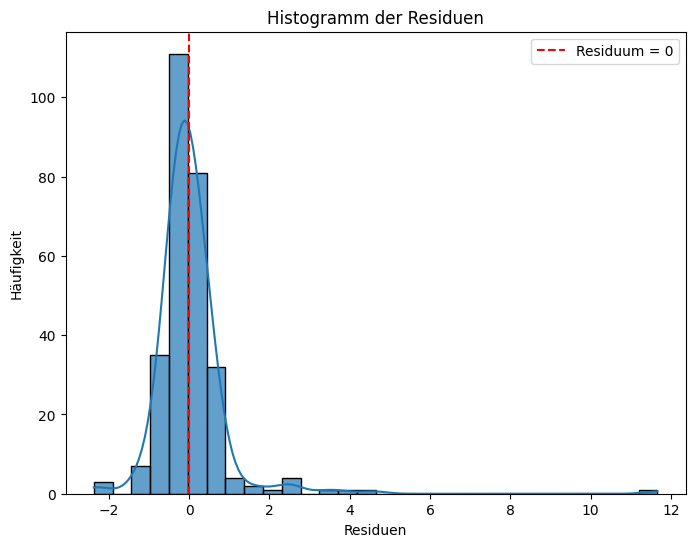

Mean Absolute Error (MAE): 61850.93
Root Mean Squared Error (RMSE): 125138.62
R-Squared (R²): 0.67


In [15]:
# Assuming y_test (true values) and predictions (predicted values) are available

# 1. Scatterplot: Predictions vs. True Values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.5, c=y_test, cmap="viridis", label="Vorhersagen")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfekte Vorhersage")
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vorhergesagte Werte")
plt.legend()
plt.title("Scatterplot: Vorhersagen vs. Tatsächliche Werte")
plt.show()

# 2. Residuen-Plot
residuals = (y_test - predictions) / np.std(y_test - predictions)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--", label="Keine Abweichung")
plt.fill_between(
    y_test, -1.96 * np.std(residuals), 1.96 * np.std(residuals), color="gray", alpha=0.2, label="95% Konfidenzintervall"
)
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Residuen")
plt.title("Residuen-Plot")
plt.legend()
plt.show()

# 3. Histogramm der Residuen
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, edgecolor="k", alpha=0.7)
plt.axvline(0, color="red", linestyle="--", label="Residuum = 0")
plt.xlabel("Residuen")
plt.ylabel("Häufigkeit")
plt.title("Histogramm der Residuen")
plt.legend()
plt.show()

# 4. Metriken ausgeben
mae = mean_absolute_error(y_test, predictions)
medae = np.median(np.abs(y_test - predictions))
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

C:\Users\Felix\AppData\Local\Temp\ipykernel_29716\1851616639.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_means = binned_residuals.groupby('Bins').mean()


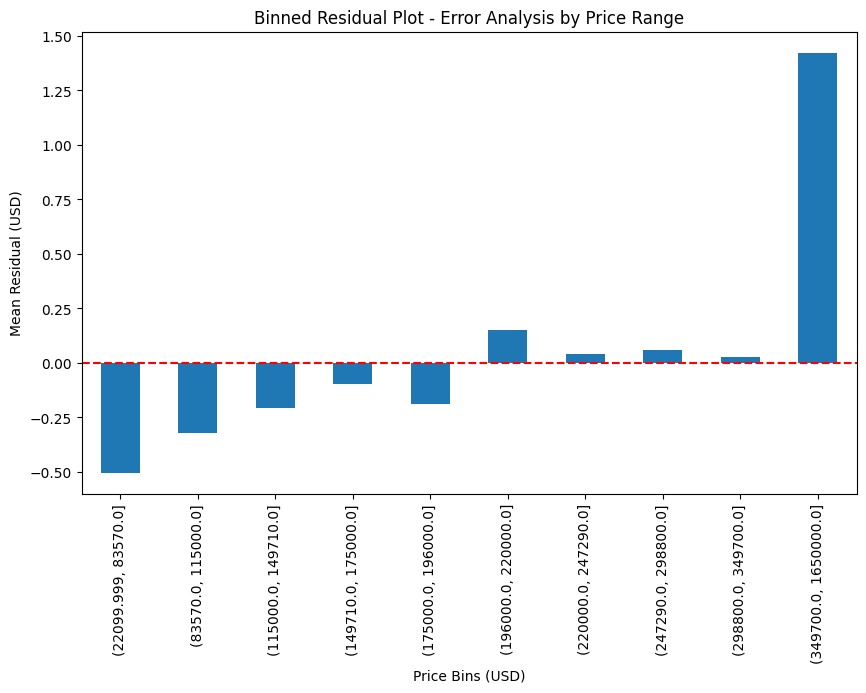

In [18]:
# Bin the true values
bins = pd.qcut(y_test, q=10, duplicates="drop")
binned_residuals = pd.DataFrame({"Residuals": residuals, "Bins": bins})
binned_means = binned_residuals.groupby("Bins").mean()

# Plot
plt.figure(figsize=(10, 6))
binned_means["Residuals"].plot(kind="bar")
plt.axhline(0, color="red", linestyle="--")
plt.title("Binned Residual Plot - Error Analysis by Price Range")
plt.xlabel("Price Bins (USD)")
plt.ylabel("Mean Residual (USD)")
plt.show()

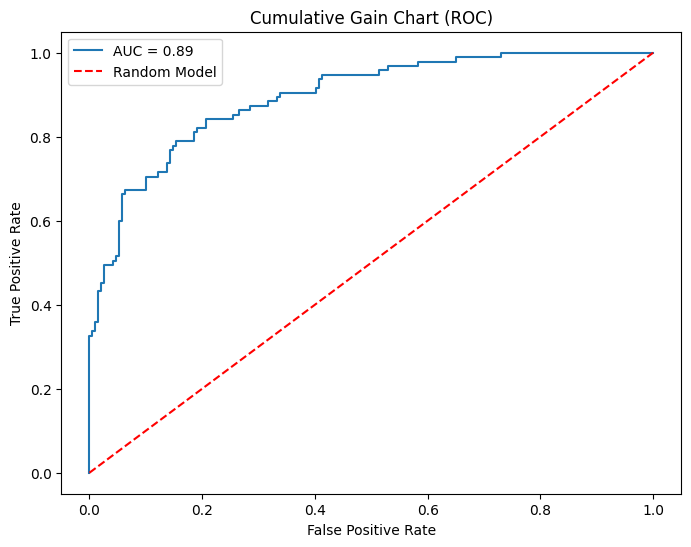

In [19]:
# ROC Curve (for classification models or thresholds)
fpr, tpr, _ = roc_curve(y_test > y_test.mean(), predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "r--", label="Random Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Cumulative Gain Chart (ROC)")
plt.legend()
plt.show()

C:\Users\Felix\AppData\Local\Temp\ipykernel_29716\4096172751.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.abs(residuals), shade=True)


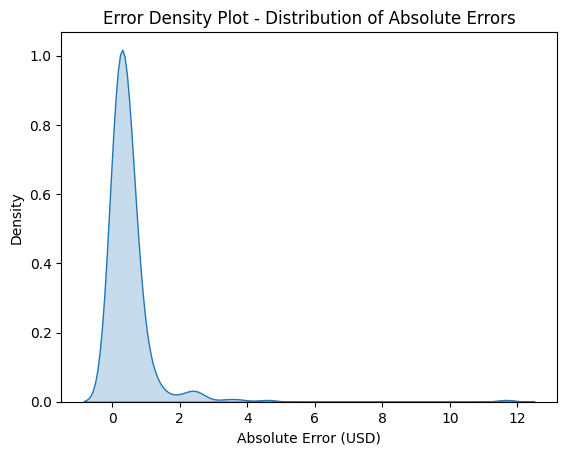

In [20]:
sns.kdeplot(np.abs(residuals), shade=True)
plt.title("Error Density Plot - Distribution of Absolute Errors")
plt.xlabel("Absolute Error (USD)")
plt.ylabel("Density")
plt.show()

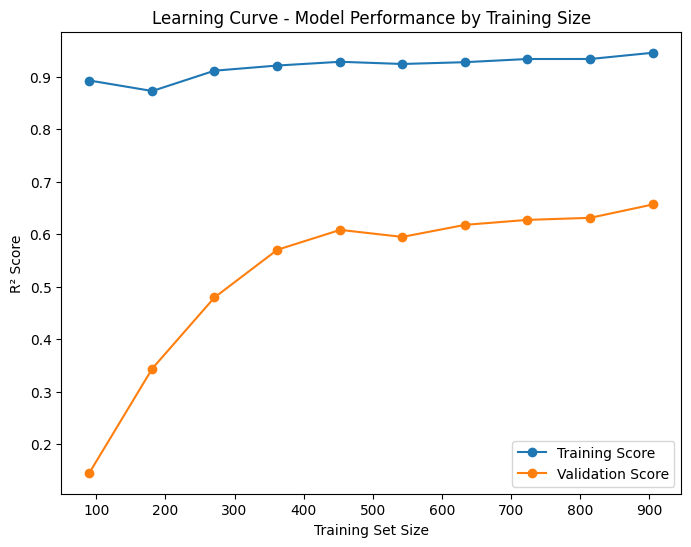

In [21]:
train_sizes, train_scores, test_scores = learning_curve(
    pipe, X_train, y_train, cv=5, scoring="r2", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, "o-", label="Training Score")
plt.plot(train_sizes, test_mean, "o-", label="Validation Score")
plt.title("Learning Curve - Model Performance by Training Size")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend()
plt.show()

In [22]:
# Assuming `pipe` is a fitted pipeline
PartialDependenceDisplay.from_estimator(pipe, X_test, features=[0, 1], feature_names=X.columns[:2])
plt.title("Partial Dependence Plot - Feature Impact on Predictions")
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

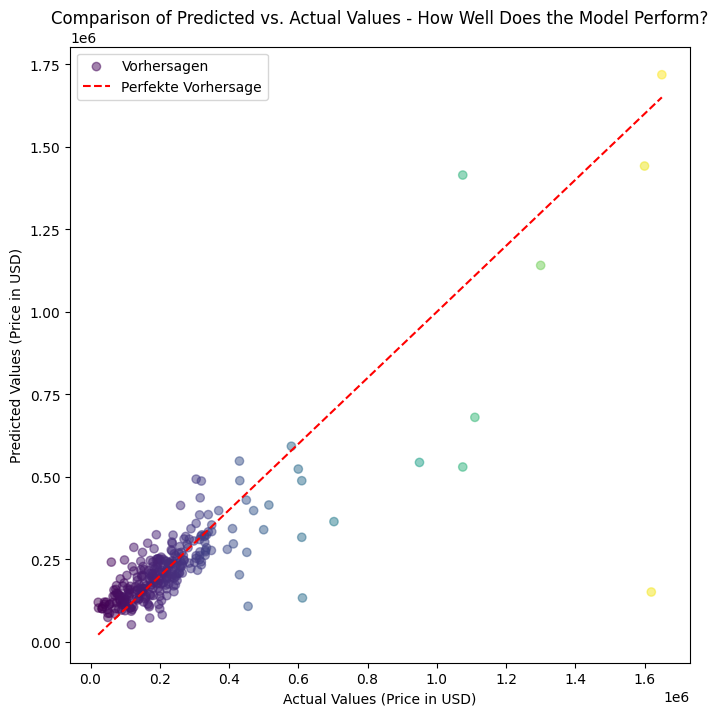

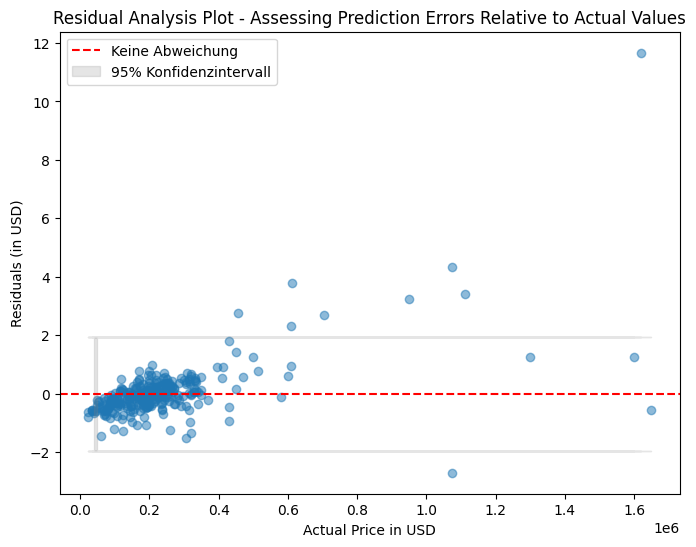

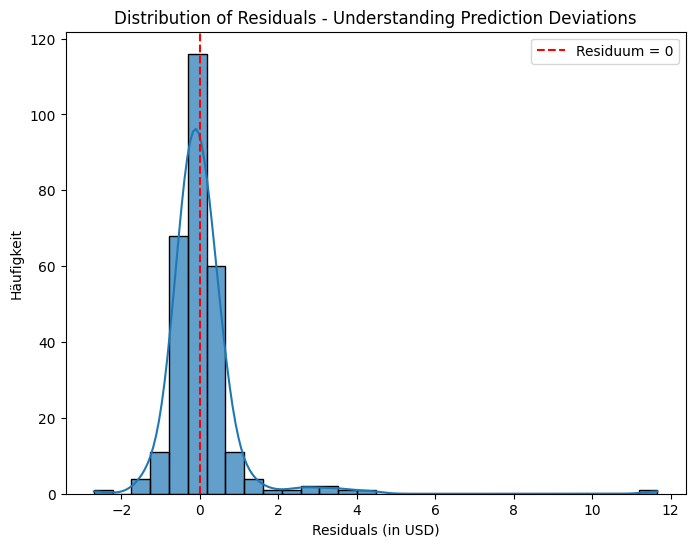

Mean Absolute Error (MAE): 62090.90 - Indicates the average absolute difference between predicted and actual values.
Root Mean Squared Error (RMSE): 125955.10 - Reflects the magnitude of prediction errors, emphasizing larger errors.
R-Squared (R²): 0.66 - Measures the proportion of variance in the target variable explained by the model.


C:\Users\Felix\AppData\Local\Temp\ipykernel_26496\721328780.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_means = binned_residuals.groupby('Bins').mean()


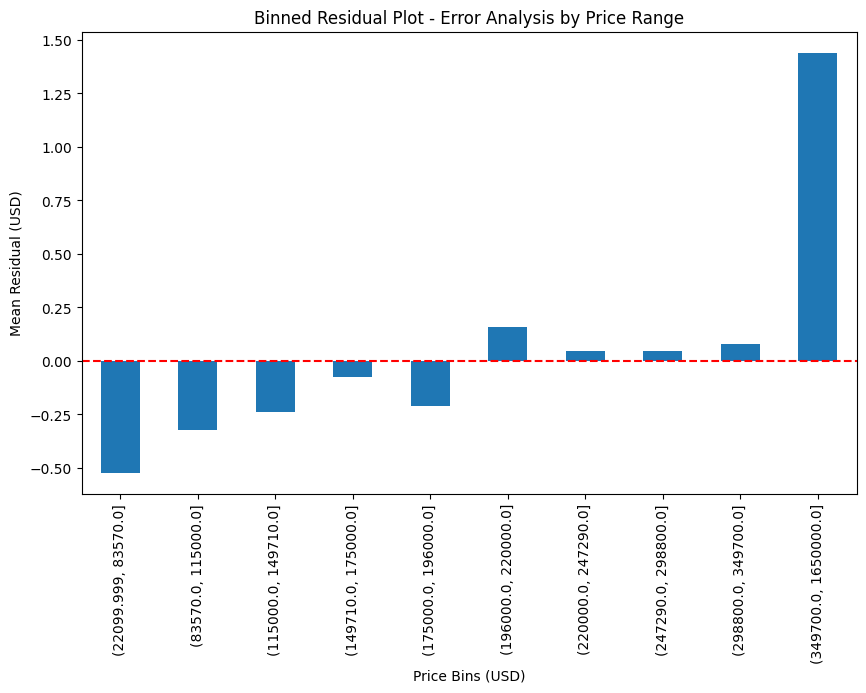

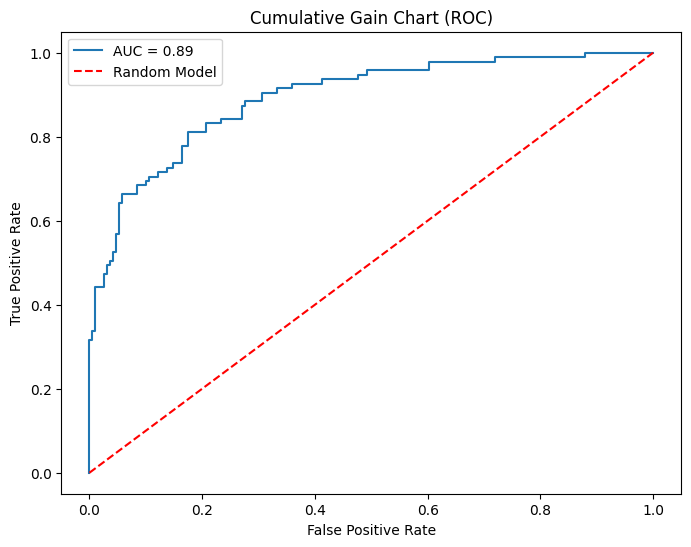

C:\Users\Felix\AppData\Local\Temp\ipykernel_26496\721328780.py:80: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.abs(residuals), shade=True)


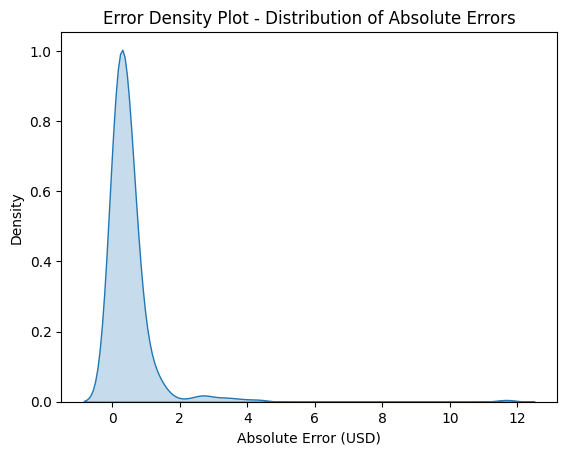

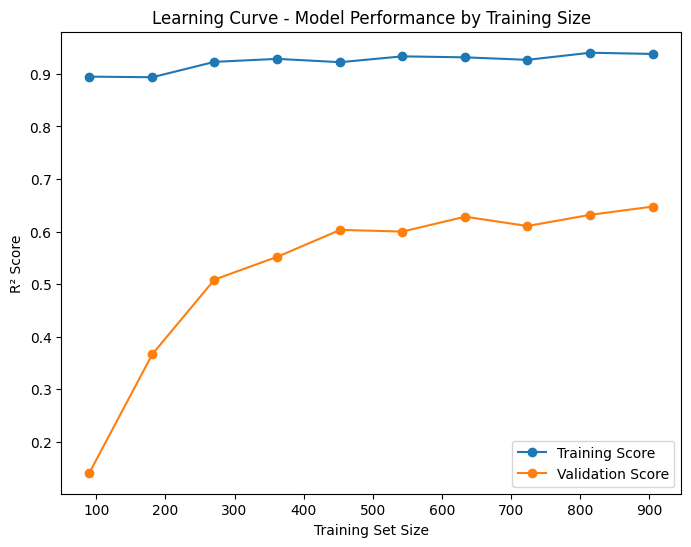

In [79]:
# Assuming y_test (true values) and predictions (predicted values) are available

# 1. Scatterplot: Predictions vs. True Values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.5, c=y_test, cmap="viridis", label="Vorhersagen")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfekte Vorhersage")
plt.xlabel("Actual Values (Price in USD)")
plt.ylabel("Predicted Values (Price in USD)")
plt.legend()
plt.title("Comparison of Predicted vs. Actual Values - How Well Does the Model Perform?")
plt.show()

# 2. Residuen-Plot
residuals = (y_test - predictions) / np.std(y_test - predictions)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--", label="Keine Abweichung")
plt.fill_between(
    y_test, -1.96 * np.std(residuals), 1.96 * np.std(residuals), color="gray", alpha=0.2, label="95% Konfidenzintervall"
)
plt.xlabel("Actual Price in USD")
plt.ylabel("Residuals (in USD)")
plt.title("Residual Analysis Plot - Assessing Prediction Errors Relative to Actual Values")
plt.legend()
plt.show()

# 3. Histogramm der Residuen
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, edgecolor="k", alpha=0.7)
plt.axvline(0, color="red", linestyle="--", label="Residuum = 0")
plt.xlabel("Residuals (in USD)")
plt.ylabel("Häufigkeit")
plt.title("Distribution of Residuals - Understanding Prediction Deviations")
plt.legend()
plt.show()

# 4. Metriken ausgeben
mae = mean_absolute_error(y_test, predictions)
medae = np.median(np.abs(y_test - predictions))
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f} - Indicates the average absolute difference between predicted and actual values.")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} - Reflects the magnitude of prediction errors, emphasizing larger errors.")
print(f"R-Squared (R²): {r2:.2f} - Measures the proportion of variance in the target variable explained by the model.")

# 5. Binned Residual Plot
bins = pd.qcut(y_test, q=10, duplicates="drop")
binned_residuals = pd.DataFrame({"Residuals": residuals, "Bins": bins})
binned_means = binned_residuals.groupby("Bins").mean()

plt.figure(figsize=(10, 6))
binned_means["Residuals"].plot(kind="bar")
plt.axhline(0, color="red", linestyle="--")
plt.title("Binned Residual Plot - Error Analysis by Price Range")
plt.xlabel("Price Bins (USD)")
plt.ylabel("Mean Residual (USD)")
plt.show()

# 6. Cumulative Gain Chart
fpr, tpr, _ = roc_curve(y_test > y_test.mean(), predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "r--", label="Random Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Cumulative Gain Chart (ROC)")
plt.legend()
plt.show()

# 7. Error Density Plot
sns.kdeplot(np.abs(residuals), shade=True)
plt.title("Error Density Plot - Distribution of Absolute Errors")
plt.xlabel("Absolute Error (USD)")
plt.ylabel("Density")
plt.show()

# 8. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    pipe, X_train, y_train, cv=5, scoring="r2", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, "o-", label="Training Score")
plt.plot(train_sizes, test_mean, "o-", label="Validation Score")
plt.title("Learning Curve - Model Performance by Training Size")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend()
plt.show()


#

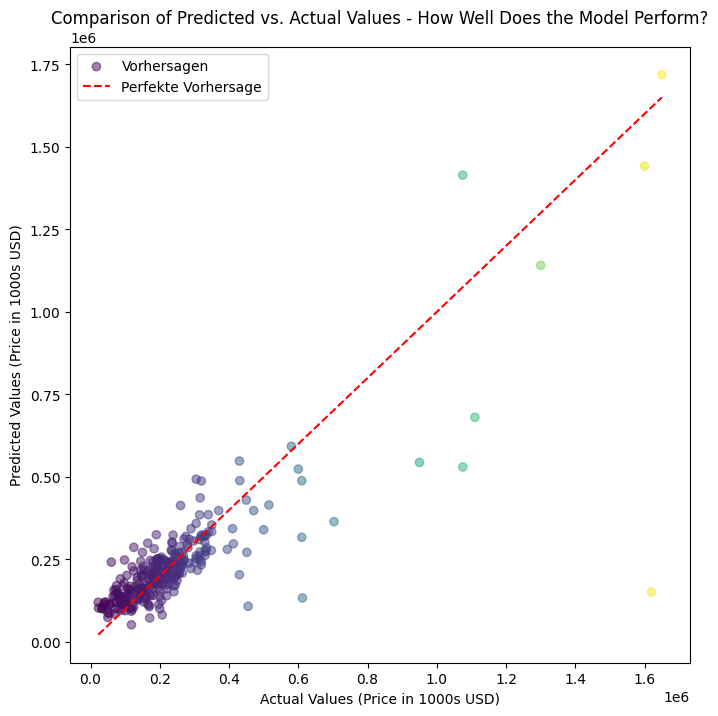

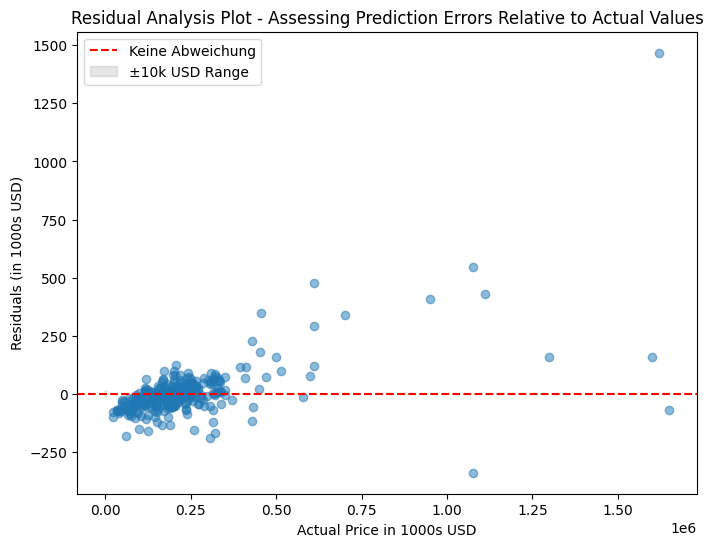

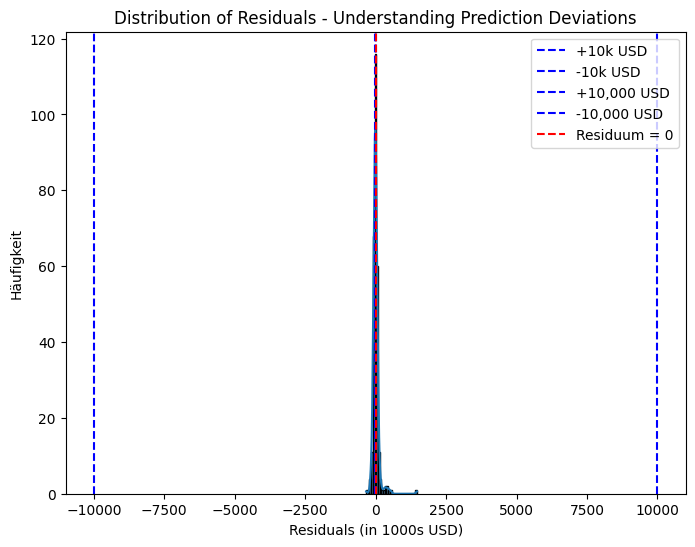

Mean Absolute Error (MAE): 62090.90 - Indicates the average absolute difference between predicted and actual values.
Root Mean Squared Error (RMSE): 125955.10 - Reflects the magnitude of prediction errors, emphasizing larger errors.
R-Squared (R²): 0.66 - Measures the proportion of variance in the target variable explained by the model.


C:\Users\Felix\AppData\Local\Temp\ipykernel_26496\3139536330.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_means = binned_residuals.groupby('Bins').mean()


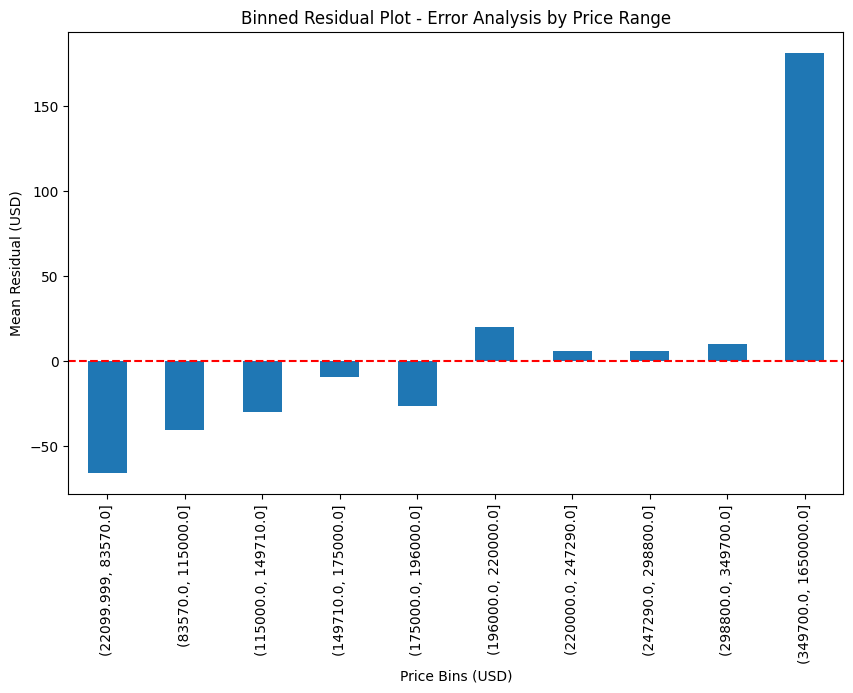

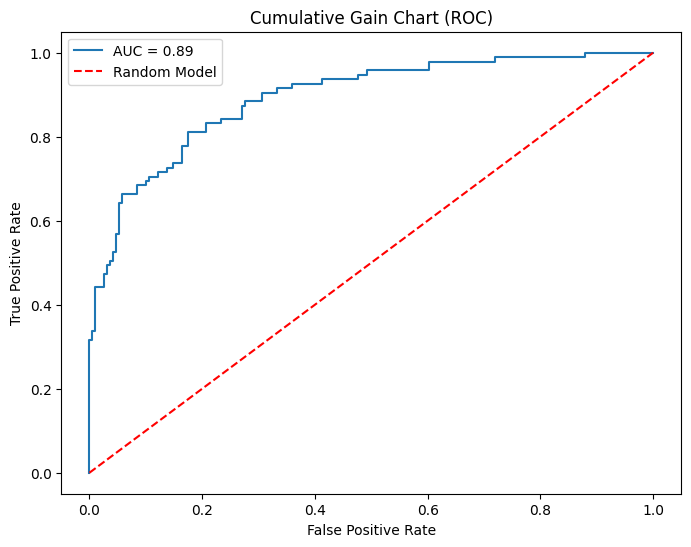

C:\Users\Felix\AppData\Local\Temp\ipykernel_26496\3139536330.py:84: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.abs(residuals), shade=True)


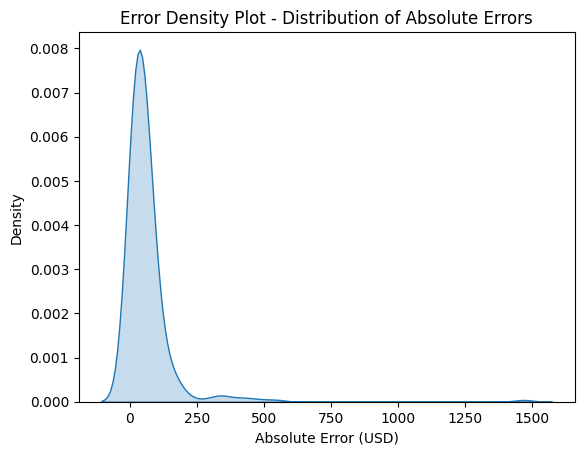

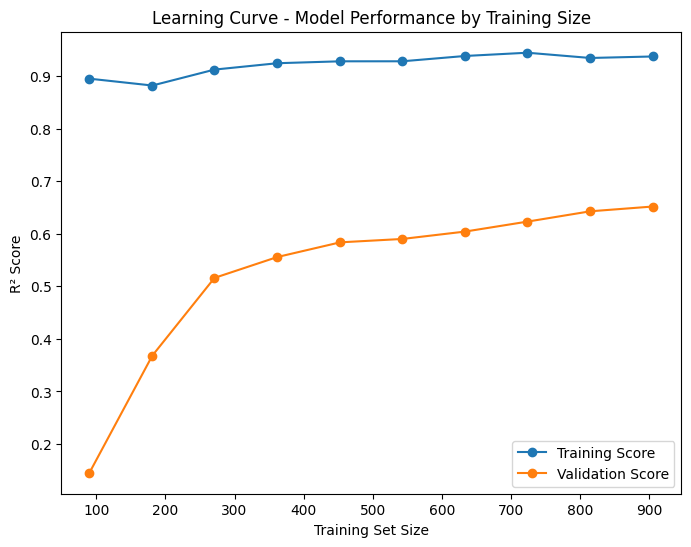

In [82]:
# Assuming y_test (true values) and predictions (predicted values) are available

# 1. Scatterplot: Predictions vs. True Values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.5, c=y_test, cmap="viridis", label="Vorhersagen")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfekte Vorhersage")
plt.xlabel("Actual Values (Price in 1000s USD)")
plt.ylabel("Predicted Values (Price in 1000s USD)")
plt.legend()
plt.title("Comparison of Predicted vs. Actual Values - How Well Does the Model Perform?")
plt.show()

# 2. Residuen-Plot
residuals = (y_test - predictions) / 1000
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--", label="Keine Abweichung")
plt.fill_between(y_test / 1000, -10, 10, color="gray", alpha=0.2, label="±10k USD Range")
plt.xlabel("Actual Price in 1000s USD")
plt.ylabel("Residuals (in 1000s USD)")
plt.title("Residual Analysis Plot - Assessing Prediction Errors Relative to Actual Values")
plt.legend()
plt.show()

# 3. Histogramm der Residuen
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, edgecolor="k", alpha=0.7)
plt.axvline(10, color="blue", linestyle="--", label="+10k USD")
plt.axvline(-10, color="blue", linestyle="--", label="-10k USD")
plt.axvline(10000, color="blue", linestyle="--", label="+10,000 USD")
plt.axvline(-10000, color="blue", linestyle="--", label="-10,000 USD")
plt.axvline(0, color="red", linestyle="--", label="Residuum = 0")
plt.xlabel("Residuals (in 1000s USD)")
plt.ylabel("Häufigkeit")
plt.title("Distribution of Residuals - Understanding Prediction Deviations")
plt.legend()
plt.show()

# 4. Metriken ausgeben
mae = mean_absolute_error(y_test, predictions)
medae = np.median(np.abs(y_test - predictions))
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f} - Indicates the average absolute difference between predicted and actual values.")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} - Reflects the magnitude of prediction errors, emphasizing larger errors.")
print(f"R-Squared (R²): {r2:.2f} - Measures the proportion of variance in the target variable explained by the model.")

# 5. Binned Residual Plot
bins = pd.qcut(y_test, q=10, duplicates="drop")
binned_residuals = pd.DataFrame({"Residuals": residuals, "Bins": bins})
binned_means = binned_residuals.groupby("Bins").mean()

plt.figure(figsize=(10, 6))
binned_means["Residuals"].plot(kind="bar")
plt.axhline(0, color="red", linestyle="--")
plt.title("Binned Residual Plot - Error Analysis by Price Range")
plt.xlabel("Price Bins (USD)")
plt.ylabel("Mean Residual (USD)")
plt.show()

# 6. Cumulative Gain Chart
fpr, tpr, _ = roc_curve(y_test > y_test.mean(), predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "r--", label="Random Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Cumulative Gain Chart (ROC)")
plt.legend()
plt.show()

# 7. Error Density Plot
sns.kdeplot(np.abs(residuals), shade=True)
plt.title("Error Density Plot - Distribution of Absolute Errors")
plt.xlabel("Absolute Error (USD)")
plt.ylabel("Density")
plt.show()

# 8. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    pipe, X_train, y_train, cv=5, scoring="r2", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, "o-", label="Training Score")
plt.plot(train_sizes, test_mean, "o-", label="Validation Score")
plt.title("Learning Curve - Model Performance by Training Size")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend()
plt.show()

In [83]:
# Assuming y_test (true values) and predictions (predicted values) are available

# 1. Scatterplot: Predictions vs. True Values
fig = px.scatter(
    x=y_test / 1000,
    y=predictions / 1000,
    labels={"x": "Actual Values (Price in 1000s USD)", "y": "Predicted Values (Price in 1000s USD)"},
    title="Comparison of Predicted vs. Actual Values - How Well Does the Model Perform?",
)
fig.add_trace(
    go.Scatter(
        x=[y_test.min() / 1000, y_test.max() / 1000],
        y=[y_test.min() / 1000, y_test.max() / 1000],
        mode="lines",
        name="Perfect Prediction",
        line=dict(color="red", dash="dash"),
    )
)
fig.show()

# 2. Residuen-Plot
residuals = (y_test - predictions) / 1000
fig = px.scatter(
    x=y_test / 1000,
    y=residuals,
    labels={"x": "Actual Price in 1000s USD", "y": "Residuals (in 1000s USD)"},
    title="Residual Analysis Plot - Assessing Prediction Errors Relative to Actual Values",
)
fig.add_hline(y=0, line=dict(color="red", dash="dash"), name="No Deviation")
fig.add_shape(
    type="rect",
    x0=y_test.min() / 1000,
    x1=y_test.max() / 1000,
    y0=-10,
    y1=10,
    line=dict(color="gray", dash="dot"),
    fillcolor="rgba(128,128,128,0.2)",
    name="±10k USD Range",
)
fig.show()

# 3. Histogramm der Residuen
fig = px.histogram(
    x=residuals,
    nbins=30,
    marginal="box",
    labels={"x": "Residuals (in 1000s USD)"},
    title="Distribution of Residuals - Understanding Prediction Deviations",
)
fig.add_vline(x=10, line=dict(color="blue", dash="dash"), name="+10k USD")
fig.add_vline(x=-10, line=dict(color="blue", dash="dash"), name="-10k USD")
fig.add_vline(x=0, line=dict(color="red", dash="dash"), name="Residuum = 0")
fig.show()

# 4. Metriken ausgeben
mae = mean_absolute_error(y_test, predictions) / 1000
rmse = np.sqrt(mean_squared_error(y_test, predictions)) / 1000
r2 = r2_score(y_test, predictions)

print(
    f"Mean Absolute Error (MAE): {mae:.2f}k USD - Indicates the average absolute difference between predicted and actual values."
)
print(
    f"Root Mean Squared Error (RMSE): {rmse:.2f}k USD - Reflects the magnitude of prediction errors, emphasizing larger errors."
)
print(f"R-Squared (R²): {r2:.2f} - Measures the proportion of variance in the target variable explained by the model.")

# 5. Binned Residual Plot
bins = pd.qcut(y_test, q=10, duplicates="drop")
binned_residuals = pd.DataFrame({"Residuals": residuals, "Bins": bins})
binned_means = binned_residuals.groupby("Bins").mean()

fig = px.bar(
    x=binned_means.index.astype(str),
    y=binned_means["Residuals"],
    labels={"x": "Price Bins (USD)", "y": "Mean Residual (USD)"},
    title="Binned Residual Plot - Error Analysis by Price Range",
)
fig.add_hline(y=0, line=dict(color="red", dash="dash"), name="No Deviation")
fig.show()

# 6. Cumulative Gain Chart
fpr, tpr, _ = roc_curve(y_test > y_test.mean(), predictions)
roc_auc = auc(fpr, tpr)

fig = px.area(
    x=fpr,
    y=tpr,
    labels={"x": "False Positive Rate", "y": "True Positive Rate"},
    title="Cumulative Gain Chart (ROC)",
    line_shape="spline",
)
fig.add_shape(type="line", x0=0, y0=0, x1=1, y1=1, line=dict(color="red", dash="dash"), name="Random Model")
fig.show()

# 7. Error Density Plot
fig = px.density_contour(
    x=np.abs(residuals), labels={"x": "Absolute Error (USD)"}, title="Error Density Plot - Distribution of Absolute Errors"
)
fig.show()

# 8. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    pipe, X_train, y_train, cv=5, scoring="r2", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

fig = px.line(
    x=train_sizes,
    y=[train_mean, test_mean],
    labels={"x": "Training Set Size", "y": "R² Score"},
    title="Learning Curve - Model Performance by Training Size",
)
fig.show()

Mean Absolute Error (MAE): 62.09k USD - Indicates the average absolute difference between predicted and actual values.
Root Mean Squared Error (RMSE): 125.96k USD - Reflects the magnitude of prediction errors, emphasizing larger errors.
R-Squared (R²): 0.66 - Measures the proportion of variance in the target variable explained by the model.


C:\Users\Felix\AppData\Local\Temp\ipykernel_26496\598740532.py:56: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [23]:
# 4. Metriken ausgeben
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(
    f"Mean Absolute Error (MAE): {mae:.2f} USD - Indicates the average absolute difference between predicted and actual values."
)
print(
    f"Root Mean Squared Error (RMSE): {rmse:.2f} USD - Reflects the magnitude of prediction errors, emphasizing larger errors."
)
print(f"R-Squared (R²): {r2:.2f} - Measures the proportion of variance in the target variable explained by the model.")

Mean Absolute Error (MAE): 61850.93 USD - Indicates the average absolute difference between predicted and actual values.
Root Mean Squared Error (RMSE): 125138.62 USD - Reflects the magnitude of prediction errors, emphasizing larger errors.
R-Squared (R²): 0.67 - Measures the proportion of variance in the target variable explained by the model.
